# DATA

### id - A unique record identifier.

### manntal - The census or registration year/number. (Icelandic genealogical records often use “mannatal” to indicate the census in which the individual was recorded.)

### nafn - Full name.

### fornafn - First name.

### millinafn - Middle name.

### eftirnafn - Last name or surname.

### aettarnafn - Family or lineage name (often reflecting a patronymic or inherited family name).

### faedingarar - Year of birth (the Icelandic “fædingarár” means birth year).

### kyn - Gender (values like “Kona” for female and “Karl” for male).

### stada - Relationship or kinship relation. The entries (such as “kona hans” [his wife], “hans barn” [his child], “hennar son” [her son], “húsbóndi” [husband], “deres sön” [their son], “þeirra börn” [their children], “hans móðir” [his mother]) indicate the individual's relation to a household head or relative.

### hjuskapur - Marital status. The codes “G” (short for “gift,” meaning married) and “Ó” (short for “ógift,” meaning unmarried) are used.

### bi_einstaklingur - An identifier for the individual from a specific registry (the “BI” prefix suggests it’s a coded system).

### baerid - A farm or town identifier. (The Icelandic “bær” can mean farm or small town.)

### bi_baer - Another identifier related to the farm/town, perhaps a secondary or complementary code.

### bi_hreppur - A district or rural municipality code. (“Hreppur” typically refers to a rural district.)

### bi_sokn - Parish code. (“Sókn” means parish.)

### bi_sysla - County code. (“Sysla” means county.)

### thsk_maki - Spouse identifier from the national registry (“thsk” is likely an abbreviation of “þjóðskrá,” meaning National Registry).

### thsk_fadir - Father’s identifier from the national registry.

### thsk_modir - Mother’s identifier from the national registry.

### maki - A spouse (or husband) identifier from another source.

### fadir - Father’s identifier.

### modir - Mother’s identifier.

In [1]:
import numpy as np
import pandas as pd
from itertools import permutations

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df = pd.read_csv("data/manntol_einstaklingar_new.csv")
print(df.shape)
unclean_status_counts = df['bi_einstaklingur'].value_counts()
print(len(unclean_status_counts))

/tmp/ipykernel_64182/592345513.py:1: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/manntol_einstaklingar_new.csv")


(984029, 23)
226813


In [11]:
df_to_plot = df[df['bi_einstaklingur'].isin(df['bi_einstaklingur'].value_counts()[df['bi_einstaklingur'].value_counts() > 1].index)]
print(len(df_to_plot))

# Add an extra column to the dataframe to hold the number of times each individual appears in the dataframe
df_to_plot['bi_einstaklingur_count'] = df_to_plot['bi_einstaklingur'].map(df_to_plot['bi_einstaklingur'].value_counts())

372011


/tmp/ipykernel_64182/4067952955.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_plot['bi_einstaklingur_count'] = df_to_plot['bi_einstaklingur'].map(df_to_plot['bi_einstaklingur'].value_counts())


In [ ]:
df_to_plot.drop_duplicates(subset=['bi_einstaklingur'], inplace=True)

/tmp/ipykernel_64182/1178535692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_plot.drop_duplicates(subset=['bi_einstaklingur'], inplace=True)


In [32]:
df[df['bi_einstaklingur'] == 13602.0][:3]

,id,manntal,nafn,fornafn,millinafn,eftirnafn,aettarnafn,faedingarar,kyn,stada,hjuskapur,bi_einstaklingur,baerid,bi_baer,bi_hreppur,bi_sokn,bi_sysla,thsk_maki,thsk_fadir,thsk_modir,maki,fadir,modir
12198,12200,1835,Guðríður Sigurðardóttir,Guðríður,NaN,Sigurðardóttir,NaN,1832.0,Kona,þeirra barn,Ó,13602.0,1967,1149.0,68.0,72.0,22,NaN,NaN,44263.0,NaN,19403.0,9507.0
24161,24163,1835,Guðríður Sigurðardóttir,Guðríður,NaN,Sigurðardóttir,NaN,1834.0,Kona,þeirra barn,Ó,13602.0,4265,1387.0,84.0,91.0,24,NaN,36981.0,36982.0,NaN,36044.0,51084.0
48109,48111,1835,Guðríður Sigurðardóttir,Guðríður,NaN,Sigurðardóttir,NaN,1833.0,Kona,þeirra barn,Ó,13602.0,23,2265.0,123.0,149.0,25,NaN,344095.0,NaN,NaN,41630.0,35652.0


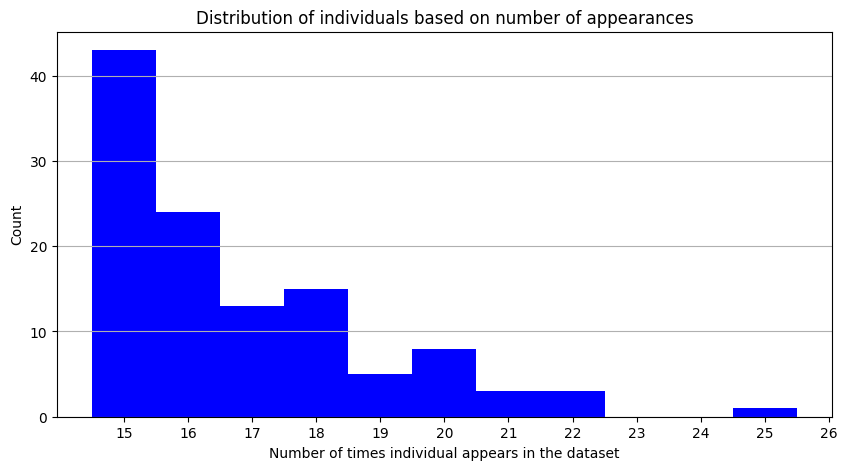

In [29]:
from matplotlib import pyplot as plt
len(df_to_plot)

# distribution based on bi_einstaklingur_count make it log scale
plt.figure(figsize=(10, 5))
plt.hist(df_to_plot['bi_einstaklingur_count'], bins=range(15, 27), align='left', color='blue')
plt.xticks(range(15, 27))
plt.xlabel('Number of times individual appears in the dataset')
plt.ylabel('Count')
plt.title('Distribution of individuals based on number of appearances')
plt.grid(axis='y')
plt.show()

In [3]:
print(df.head())
print(df.tail())
print(df.isna().sum()) # number of NaN values per column


   id  manntal              nafn    fornafn millinafn     eftirnafn aettarnafn  faedingarar   kyn       stada hjuskapur  bi_einstaklingur  baerid  bi_baer  bi_hreppur  bi_sokn  bi_sysla  thsk_maki  thsk_fadir  thsk_modir     maki  fadir  modir
0   2     1835   Ólöf Jónsdóttir       Ólöf       NaN    Jónsdóttir        NaN       1807.0  Kona   kona hans         G           11848.0    5526   1771.0        96.0    117.0        25    11847.0         NaN         NaN  47858.0    NaN    NaN
1   3     1835           Kristín    Kristín       NaN           NaN        NaN       1822.0  Kona   hans barn         Ó               NaN    2182   6238.0       149.0    166.0        29        NaN         NaN         NaN      NaN    NaN    NaN
2   4     1835  Jón Benediktsson        Jón       NaN  Benediktsson        NaN       1817.0  Karl  hennar son         Ó           16476.0     880   5545.0       367.0    439.0        15        NaN         NaN         NaN      NaN    NaN    NaN
3   5     1835   Gísli M

In [4]:
# Available unique values in each column
for col in df.columns:
    sample_values = df[col].dropna().unique()
    print(f"{col}: {sample_values}")

# ---------------------- Sample of 3:
print("="*50)
print("SAMPLE/C")
print("="*50)
for col in df.columns:
    # Drop NaN values and then sample up to 3 rows (if available)
    non_na = df[col].dropna()
    sample_values = non_na.sample(n=min(3, len(non_na)), random_state=42)
    print(f"{col}:")
    print(sample_values)
    print("-" * 40)

id: [      2       3       4 ... 1002198 1002199 1002200]
manntal: [1835 1840 1845 1850 1855 1860 1870 1880 1890 1901 1910 1816 1801 1920
 1703 1729]
nafn: ['Ólöf Jónsdóttir' 'Kristín' 'Jón Benediktsson' ...
 'Guðmundur Hallbjörnsson' 'Þuríður Hallbjörnsdóttir'
 'Ingunn Hallbjörnsdóttir']
fornafn: ['Ólöf' 'Kristín' 'Jón' ... 'Oddvör' 'Ásbrandur' 'Bartolomeus']
millinafn: ['Pétur' 'Jakobína' 'Kristinn' ... 'Christoffer' 'Gottrup' 'Kier']
eftirnafn: ['Jónsdóttir' 'Benediktsson' 'Magnússon' ... 'Hierónýmusdóttir'
 'Bartolomeusson' 'Bartolomeusdóttir']
aettarnafn: ['Scheving' 'Stephensen' 'Sandholt' 'Thomsen' 'Blöndahl' 'Hjaltalín'
 'Thorarensen' 'Briem' 'Lilliendahl' 'Jakobæus' 'Waage' 'Waager'
 'Schelund' 'Bergsted' 'Kerúlf' 'Thoroddsen' 'Möller' 'Espólín' 'Melbye'
 'Norðfjörð' 'Hansen' 'Bernhöft' 'Tvede' 'Schram' 'Móberg' 'Biering'
 'Viborg' 'Long' 'Nielsen' 'Aaberg' 'Melsteð' 'Clausen' 'Ísfeld'
 'Thorberg' 'Thorkelín' 'Beck' 'Havsteen' 'Lynge' 'Sívertsen' 'Thorlacius'
 'Skagfjörð' 'Jón

# Data Transformations

In [34]:
#!/usr/bin/env python
import pandas as pd
import numpy as np

from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# --- Custom Transformer to Concatenate Name Columns ---
class NameConcatenator(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()
        # Fill missing values with empty strings and convert to string
        for col in self.columns:
            X_copy[col] = X_copy[col].fillna("").astype(str)
        # Concatenate all name columns with a space separator
        X_copy["full_name"] = X_copy[self.columns].agg(" ".join, axis=1)
        # Return a DataFrame with only the new full_name column
        return X_copy[["full_name"]]

def extract_full_name(X):
    # Extract the "full_name" column as a 1D array of strings
    return X["full_name"].values

# --- Define Column Names ---
name_columns = ["nafn", "fornafn", "millinafn", "eftirnafn", "aettarnafn"]
numeric_features = [
    "manntal", "faedingarar", "bi_einstaklingur", "baerid", 
    "bi_baer", "bi_hreppur", "bi_sokn", "bi_sysla", 
    "thsk_maki", "thsk_fadir", "thsk_modir", "maki", "fadir", "modir"
]
categorical_features = ["kyn", "stada", "hjuskapur"]

# --- Build Pipeline for the Name Fields ---
text_pipeline = Pipeline([
    ('concat', NameConcatenator(columns=name_columns)),
    ('extract', FunctionTransformer(extract_full_name, validate=False)),
    # Reduced max_features to 2000 for speed/memory. Adjust as needed.
    ('tfidf', TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 4), max_features=2000))
])

# --- Build Pipeline for Numeric Features ---
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# --- Build Pipeline for Categorical Features ---
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# --- Passthrough for the "id" Column ---
id_pipeline = Pipeline([
    ('identity', FunctionTransformer(lambda X: X, validate=False))
])

# --- Combine Pipelines Using ColumnTransformer ---
preprocessor = ColumnTransformer(
    transformers=[
        ('id', id_pipeline, ['id']),
        ('name', text_pipeline, name_columns),
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='drop'
)

# --- Load Your Full Data ---
df = pd.read_csv("data/manntol_einstaklingar_new.csv", low_memory=False)

# --- Filter to Labeled Subset Only ---
mask = df["bi_einstaklingur"].notnull()
df_labeled = df[mask].copy()

# --- Fit and Transform Only the Labeled Subset ---
X_labeled = preprocessor.fit_transform(df_labeled)

print("Encoded labeled data shape:", X_labeled.shape)

# --- Train/Test/Eval Split ---
train_idx, temp_idx = train_test_split(df_labeled.index, test_size=0.3, random_state=42)
test_idx, eval_idx = train_test_split(temp_idx, test_size=0.5, random_state=42)

train_mask = df_labeled.index.isin(train_idx)
test_mask  = df_labeled.index.isin(test_idx)
eval_mask  = df_labeled.index.isin(eval_idx)

X_train = X_labeled[train_mask]
X_test  = X_labeled[test_mask]
X_eval  = X_labeled[eval_mask]

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Eval shape:", X_eval.shape)

# --- Save Each Split as Sparse .npz ---
sparse.save_npz("encoded_train.npz", X_train)
sparse.save_npz("encoded_test.npz", X_test)
sparse.save_npz("encoded_eval.npz", X_eval)

print("Saved all splits to .npz files.")


Encoded labeled data shape: (492991, 31673)
Train shape: (345093, 31673)
Test shape: (73949, 31673)
Eval shape: (73949, 31673)
Saved all splits to .npz files.
